
Đa thức nội suy của bộ điểm đã cho là: 
[ 5.85699475e-04 -8.06884200e-03  4.47274057e-02 -1.28121653e-01
  2.39669438e-01 -4.07720887e-01  1.27696737e-01  9.72805686e-01
  3.24586680e-12]


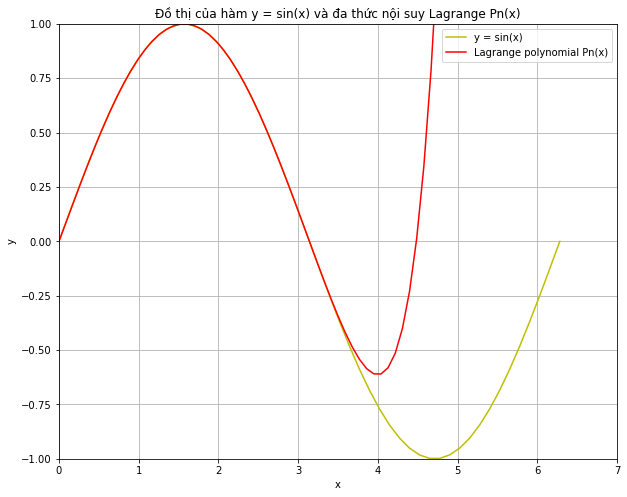

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

def HornerInverseMethod(X):
    W = np.array([])
    W = np.append(W, 1)
    W = np.append(W, -X[0])
    
    for i in np.arange(1, len(X)):             
        ithMulti = np.array([X[i] * k for k in W])
        
        W = np.append(W, 0)   
        for i in np.arange(1, len(W)): 
            W[i] = W[i] - ithMulti[i - 1]
            
    return W

def HornerMethod(P, c): 
    Q = np.array([])            
    Q = np.append(Q, P[0])    
    
    for i in np.arange(1, len(P) - 1): 
        q = P[i] + Q[i - 1] * c 
        Q = np.append(Q, q)
    
    return Q

def main(X, Y): 
    W = HornerInverseMethod(X)
    
    L = np.zeros(len(X))
    for j in np.arange(len(X)): 
        Lj = HornerMethod(W, X[j])
        if j == 0: 
            L = np.array([Lj])
        else: 
            L = np.append(L, [Lj], axis = 0)
        
    addiCoef = np.array([])
    for j in np.arange(len(X)): 
        deriWi = 1
        for i in np.arange(len(X)): 
            if X[i] == X[j]: 
                continue
            else: 
                deriWi = deriWi * (X[j] - X[i])
    
        addiCoef = np.append(addiCoef, Y[j] / deriWi)
    
    for j in np.arange(len(L)):
        L[j] = L[j] * addiCoef[j]
        
    Pn = np.zeros(len(L[0]))
    for i in np.arange(len(L)): 
        Pn = Pn + L[i]
    
    print()
    print("Đa thức nội suy của bộ điểm đã cho là: ")
    print(Pn)
    return Pn

def polyEval(x, Pn): 
    Q = []            
    Q.append(Pn[0])    
    for i in range(1, len(Pn)): 
        y = Pn[i] + Q[i - 1] * x 
        Q.append(y)
        
    return y

X = np.array([0, 0.524, 0.785, 1.047, 1.571, 2.094, 2.356, 2.618, 3.142])
Y = np.array([0, 0.5, 0.707, 0.866, 1, 0.866, 0.707, 0.5, 0])

Pn = main(X, Y)

# Ve do thi cua da thuc noi suy Lagrange. 
plt.figure(figsize = (10, 8))

x1 = np.linspace(0, np.pi * 2, 51)
x2 = np.linspace(0, np.pi * 2, 71)

y = np.sin(x1)
P = polyEval(x2, Pn)

plt.plot(x1, y, 'y-')
plt.plot(x2, P, 'r-')

plt.xlabel('x')
plt.ylabel('y')

plt.legend(['y = sin(x)', 'Lagrange polynomial Pn(x)'])
plt.title('Đồ thị của hàm y = sin(x) và đa thức nội suy Lagrange Pn(x)')

plt.axis([0, 7, -1, 1])
plt.grid()

plt.show() 